# Linear Regression 1 Input

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('data/1.01. Simple linear regression.csv')
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [3]:
# GPA - dependent variable/output/target
# SAT - independent variable/input/feature
y = data['GPA']
x = data['SAT']

In [4]:
x.shape,y.shape

((84,), (84,))

In [5]:
x_mat = x.values.reshape(84,1)
# Or x.values.reshape(-1,1)

In [6]:
reg = LinearRegression()
reg.fit(x_mat,y) # Input first, output after - Opposite of statsmodels


LinearRegression()

##### R-squared
reg.score()

In [7]:
reg.score(x_mat,y)

0.40600391479679765

##### Coefficients
reg.coef_

In [8]:
reg.coef_

array([0.00165569])

##### Intercept
reg.intercept_

In [9]:
reg.intercept_

0.27504029966028076

##### Predictions

In [10]:
reg.predict([[1750],[1850],[1920]])

array([3.17249439, 3.33806319, 3.45396136])

In [11]:
new_data = pd.DataFrame(data=[1740,1850],columns=['SAT'])
new_data

,SAT
0,1740
1,1850


In [12]:
reg.predict(new_data)

c:\Users\Palmg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([3.15593751, 3.33806319])

In [13]:
new_data['Predicted_GPA'] = reg.predict(new_data)
new_data

c:\Users\Palmg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,SAT,Predicted_GPA
0,1740,3.155938
1,1850,3.338063


##### Plotting

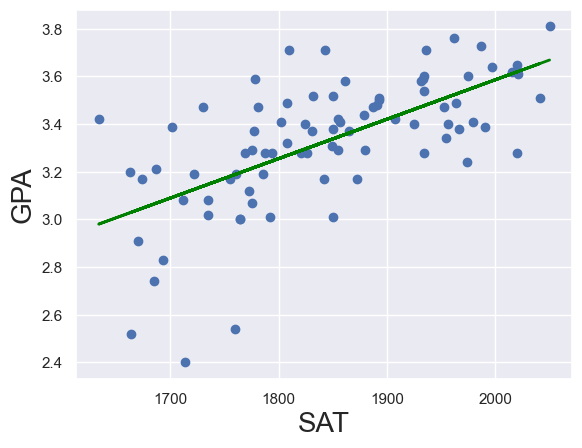

In [14]:
plt.scatter(x,y)
yhat = reg.coef_ * x_mat + reg.intercept_
fig = plt.plot(x, yhat, lw=2, c='green', label = 'reg-line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

# Multiple Inputs Linear Regression

In [15]:
data = pd.read_csv('data/1.02. Multiple linear regression.csv')
data.head()

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83


In [16]:
data.describe()

,SAT,"Rand 1,2,3",GPA
count,84.000000,84.000000,84.000000
mean,1845.273810,2.059524,3.330238
std,104.530661,0.855192,0.271617
min,1634.000000,1.000000,2.400000
25%,1772.000000,1.000000,3.190000
50%,1846.000000,2.000000,3.380000
75%,1934.000000,3.000000,3.502500
max,2050.000000,3.000000,3.810000


In [17]:
x = data[['SAT','Rand 1,2,3']]
y = data['GPA']

In [18]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [19]:
reg.coef_

array([ 0.00165354, -0.00826982])

In [20]:
reg.intercept_

0.29603261264909486

##### Adjusted R-squared

In [21]:
# Non-adjusted R-squared
reg.score(x,y)

0.4066811952814282

* Adjusted formula

$R^2(adj.) = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [22]:
x.shape

(84, 2)

* n = number of observations = 84
* p = number of predictors(inputs) = 2

In [23]:
1-(1-reg.score(x,y))*((84-1)/(84-2-1))

0.39203134825134

* If R^2(adj.) < R^2 we have inputs in our model that don't increase our regression's accuracy

##### Feature Selection

In [24]:
from sklearn.feature_selection import f_regression

In [25]:
f_reg = f_regression(x,y)
f_values = f_reg[0]
p_values = f_reg[1]

In [26]:
f_values

array([56.04804786,  0.17558437])

In [27]:
p_values

array([7.19951844e-11, 6.76291372e-01])

* SAT has 56.05 F-stat and p << 0.001 -> Statistically significant
* Rand 1,2,3 has 0.17 F-stat and p = 0.676... -> Statistically insignificant -> **Should be removed from the model**

* Makes sense since Rand 1,2,3 is just a random whole number between 1-3

* **These values don't take into account the interrelation of inputs/features** It's fine in this example though!

##### Summary table

In [28]:
reg_summary = pd.DataFrame(data=x.columns.values, columns=['Features'])
reg_summary

,Features
0,SAT
1,"Rand 1,2,3"


In [29]:
reg_summary['Coefficients'] = reg.coef_
reg_summary['p-values'] = p_values.round(3)

In [30]:
reg_summary

,Features,Coefficients,p-values
0,SAT,0.001654,0.000
1,"Rand 1,2,3",-0.008270,0.676


# Standardization

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
# Calculates mean and std
scaler.fit(x)

StandardScaler()

In [34]:
x_scaled = scaler.transform(x)
x_scaled[:5,:]

array([[-1.26338288, -1.24637147],
       [-1.74458431,  1.10632974],
       [-0.82067757,  1.10632974],
       [-1.54247971,  1.10632974],
       [-1.46548748, -0.07002087]])

### Regression with scaled input

In [35]:
reg = LinearRegression()
reg.fit(x_scaled, y)

LinearRegression()

In [36]:
reg.coef_

array([ 0.17181389, -0.00703007])

In [37]:
reg.intercept_

3.330238095238095

In [38]:
reg_summary = pd.DataFrame([['Intercept'],['SAT'], ['Rand 1,2,3']], columns=['Features'])
reg_summary['Weights'] = reg.intercept_, reg.coef_[0], reg.coef_[1] # Weights = Coefficients

In [39]:
reg_summary

,Features,Weights
0,Intercept,3.330238
1,SAT,0.171814
2,"Rand 1,2,3",-0.007030


##### Predictions

In [40]:
new_data = pd.DataFrame(data = [[1700,2],[1800,1]], columns = ['SAT', 'Rand 1,2,3'])
new_data

,SAT,"Rand 1,2,3"
0,1700,2
1,1800,1


In [41]:
reg.predict(new_data)

c:\Users\Palmg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([295.39979563, 312.58821497])

* Not looking correct, new data also needs to be scaled

In [42]:
new_data_scaled = scaler.transform(new_data)
new_data_scaled

array([[-1.39811928, -0.07002087],
       [-0.43571643, -1.24637147]])

In [43]:
reg.predict(new_data_scaled)

array([3.09051403, 3.26413803])

* -> 1st student predicted to have GPA of 3.091 | 2nd student 3.264. Looks correct

##### Remove rand 1,2,3?

In [44]:
reg_sat = LinearRegression()
x_sat = x_scaled[:,0]
x_sat

array([-1.26338288, -1.74458431, -0.82067757, -1.54247971, -1.46548748,
       -1.68684014, -0.78218146, -0.78218146, -0.51270866,  0.04548499,
       -1.06127829, -0.67631715, -1.06127829, -1.28263094, -0.6955652 ,
        0.25721362, -0.86879772, -1.64834403, -0.03150724, -0.57045283,
       -0.81105355, -1.18639066, -1.75420834, -1.52323165,  1.23886453,
       -0.18549169, -0.5608288 , -0.23361183,  1.68156984, -0.4934606 ,
       -0.73406132,  0.85390339, -0.67631715,  0.09360513,  0.33420585,
        0.03586096, -0.35872421,  1.04638396, -0.65706909, -0.13737155,
        0.18984542,  0.04548499,  1.1618723 , -1.37887123,  1.39284898,
        0.76728713, -0.20473975,  1.06563201,  0.11285319,  1.28698467,
       -0.41646838,  0.09360513,  0.59405462, -2.03330517,  0.32458182,
        0.40157405, -1.10939843,  1.03675993, -0.61857297,  0.44007016,
        1.14262424, -0.35872421,  0.45931822,  1.88367444,  0.45931822,
       -0.12774752,  0.04548499,  0.85390339,  0.15134931,  0.82

In [45]:
# Turn into 2D
x_sat = x_sat.reshape(-1,1)

In [46]:
reg_sat.fit(x_sat, y)
reg_sat.predict(new_data_scaled[:,0].reshape(-1,1))

array([3.08970998, 3.25527879])

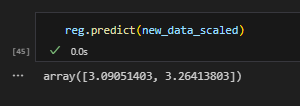

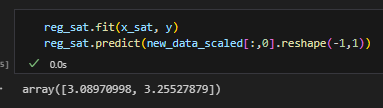

* Almost the same result -> Once again we can state that Rand 1,2,3 input had little to no effect